In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
!pip install pandas

     ---------------------------------------- 10.3/10.3 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.drop(columns=["User ID","Gender"])

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
x=df.drop(columns=["Purchased"])
y=df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
model.score(X_test,y_test)

0.8583333333333333

In [16]:
lis=model.cost_complexity_pruning_path(X_train, y_train)

In [21]:
alpha=lis["ccp_alphas"][:-1]

In [22]:
models=[]
for i in alpha:
    model = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model.fit(X_train, y_train)
    models.append(model)

In [23]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001696428571428571, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019841269841269845, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019841269841269845, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002142857142857142, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022113997113997106, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023242630385487515, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023765916623059596, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0026785714285714286, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003125, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003170995670995677, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0032142857142857147, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003673469387755101, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0037631118881118787, random_state=0),
 DecisionTreeC

In [24]:
train_val=[]
test_val=[]
for i in models:
    train=i.score(X_train, y_train)
    train_val.append(train)
    test=i.score(X_test,y_test)
    test_val.append(test)

In [27]:
import matplotlib.pyplot as plt

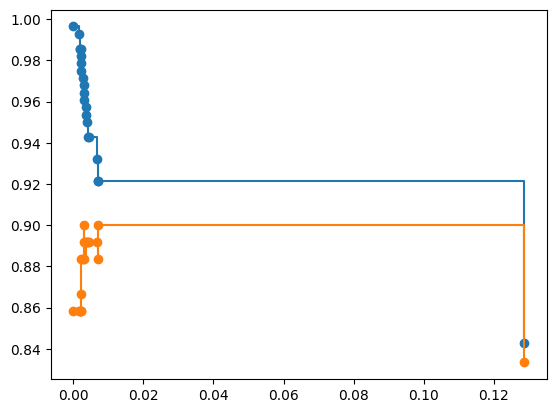

In [40]:
fig,ax=plt.subplots()
ax.plot(alpha,train_val,marker="o",label="train",drawstyle="steps-post")
ax.plot(alpha,test_val,marker="o",label="test",drawstyle="steps-post")

In [39]:
alpha

array([0.        , 0.00169643, 0.00198413, 0.00198413, 0.00214286,
       0.0022114 , 0.00232426, 0.00237659, 0.00267857, 0.003125  ,
       0.003171  , 0.00321429, 0.00367347, 0.00376311, 0.00380952,
       0.00416667, 0.00459401, 0.00687004, 0.00714286, 0.00716575,
       0.12857177])

In [41]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid=GridSearchCV(tree.DecisionTreeClassifier(random_state=0),{"ccp_alpha":alpha},cv=10)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00169643, 0.00198413, 0.00198413, 0.00214286,
       0.0022114 , 0.00232426, 0.00237659, 0.00267857, 0.003125  ,
       0.003171  , 0.00321429, 0.00367347, 0.00376311, 0.00380952,
       0.00416667, 0.00459401, 0.00687004, 0.00714286, 0.00716575,
       0.12857177])})

In [61]:
grid.best_score_

0.8785714285714287

In [60]:
grid.best_params_

{'ccp_alpha': 0.006870039682539683}

In [66]:
model=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006870039682539683)

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.006870039682539683, random_state=0)

**Predicting the Test set results**

In [68]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
model.score(X_test, y_test)

0.8916666666666667

**Making the Confusion Matrix**

In [75]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_y_pred = model.predict(X_train)
am = confusion_matrix(y_train, train_y_pred)
print(cm)
print(am)

[[71  7]
 [ 6 36]]
[[167  12]
 [  7  94]]


**Visualising the Training set results**

Text(58.222222222222214, 0.5, 'Truth')

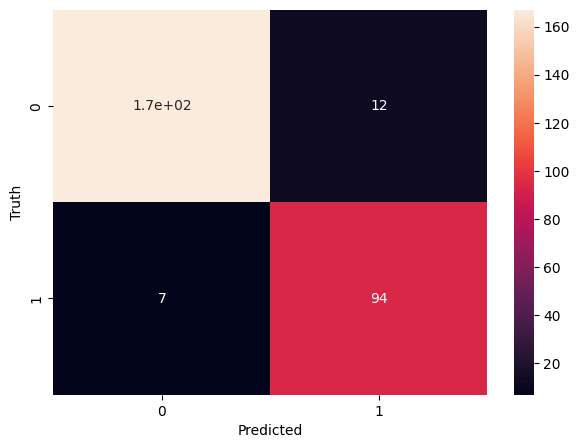

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(am, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(58.222222222222214, 0.5, 'Truth')

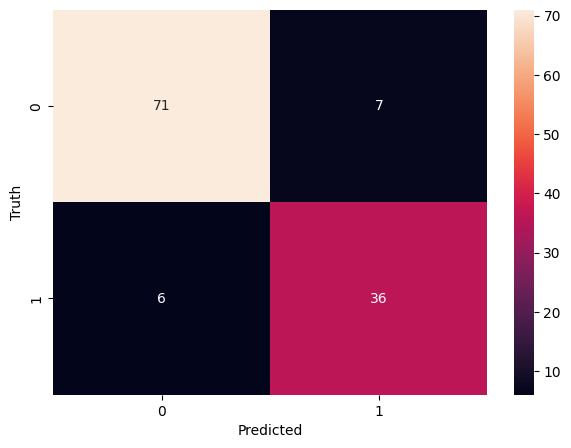

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')